In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats


In [4]:
d1 = "C:/Users/muril/OneDrive/Documents/Data Science/Proyecto DS/Microsoft Azure Predictive Maintenance/PdM_telemetry.csv"
d2 = "C:/Users/muril/OneDrive/Documents/Data Science/Proyecto DS/Microsoft Azure Predictive Maintenance/PdM_errors.csv"
d3 = "C:/Users/muril/OneDrive/Documents/Data Science/Proyecto DS/Microsoft Azure Predictive Maintenance/PdM_maint.csv"
d4 = "C:/Users/muril/OneDrive/Documents/Data Science/Proyecto DS/Microsoft Azure Predictive Maintenance/PdM_failures.csv"
d5 = "C:/Users/muril/OneDrive/Documents/Data Science/Proyecto DS/Microsoft Azure Predictive Maintenance/PdM_machines.csv"

In [5]:
telemetry_df = pd.read_csv(d1)
errors_df = pd.read_csv(d2)
maint_df = pd.read_csv(d3)
failures_df = pd.read_csv(d4)
machines_df = pd.read_csv(d5)

In [2]:
# Otra opcion de carga para lectura de los datos
'''telemetry_df = pd.read_csv('PdM_telemetry.csv')
errors_df = pd.read_csv('PdM_errors.csv')
maint_df = pd.read_csv('PdM_maint.csv')
failures_df = pd.read_csv('PdM_failures.csv')
machines_df = pd.read_csv('PdM_machines.csv')'''

# ABSTRACT
Las empresas buscan como aumentar el tiempo de servicio de las maquinas, reducir las paradas inesperadas, reducir costos de mantenimiento, aumentar la eficacia de máquinas individuales o líneas de producción y reducir el backlog (tiempo necesario para realizar el trabajo actual).
Todo esto lleva a la necesidad de encontrar formas más precisa de conocer o predecir el comportamiento futuro de la maquinaria basándose desde la adquisición y análisis de datos e información que se puede obtener a través del monitoreo real y continuo de la condición de trabajo de los equipos. 

Cuando se tiene disponibles datos sobre ciertos parámetros de funcionamiento de las maquinarias,el empleo de modelos de machine learning pueden ayudar a resolver algunos problemas a los que se enfrentan en el tiempo operativo, los gestores de mantenimiento, como ser:

- Existe alguna relacion entre los parametros monitoreados de las maquinas que permita modelar ese efecto?
-	Se podrían configurar alertas sobre comportamiento irregular en la maquinaria captando las variaciones en los valores habituales de los datos que provocan los efectos de una condición de falla inminente.
-	La posibilidad de realizar diagnóstico de tipos de fallas, prevención de las fallas, planificar y gestionar acciones correctivas o de mitigación de tareas de mantenimiento para evitar los eventos de falla.



## Contexto Comercial
La falla de un equipamiento puede implicar el daño de los componentes electrónicos en alguna parte del proceso lo que traería como consecuencia el tener que reciclar el material y volver a empezar el proceso desde el inicio. Adicionalmente a esto, un equipo con falla podría interrumpir otras etapas de los procesos generando atrasos y perdidas superlativas debido a la interrelación de los procesos entre si.


## Problema Comercial
Es de suma importancia que las fallas incipientes en los equipos puedan ser atendidas antes de que se genere la perdida de la función deseada. De aquí, la necesidad de mitigar o reducir la probabilidad de ocurrencia de fallas con el objetivo de minimizar las paradas no planificadas tanto como sea posible

# EDA

In [4]:
telemetry_df.head(3)

datetime  machineID        volt      rotate    pressure  \
0  2015-01-01 06:00:00          1  176.217853  418.504078  113.077935   
1  2015-01-01 07:00:00          1  162.879223  402.747490   95.460525   
2  2015-01-01 08:00:00          1  170.989902  527.349825   75.237905   

   vibration  
0  45.087686  
1  43.413973  
2  34.178847

In [5]:
errors_df.head(3)

datetime  machineID errorID
0  2015-01-03 07:00:00          1  error1
1  2015-01-03 20:00:00          1  error3
2  2015-01-04 06:00:00          1  error5

In [9]:
maint_df.head(3)

datetime  machineID   comp
0 2014-06-01 06:00:00          1  comp2
1 2014-07-16 06:00:00          1  comp4
2 2014-07-31 06:00:00          1  comp3

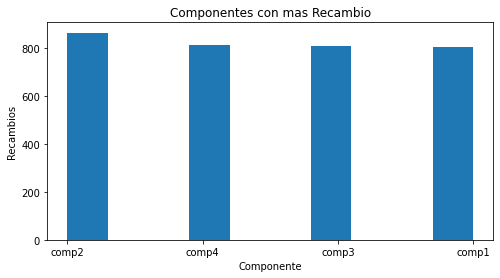

In [39]:
fig, ax = plt.subplots(figsize = (8,4))
ax.hist(maint_df['comp'])
ax.set_title('Componentes con mas Recambio')
ax.set_xlabel('Componente')
ax.set_ylabel('Recambios')
plt.show()

In [10]:
failures_df.head(3)

datetime  machineID failure
0 2015-01-05 06:00:00          1   comp4
1 2015-03-06 06:00:00          1   comp1
2 2015-04-20 06:00:00          1   comp2

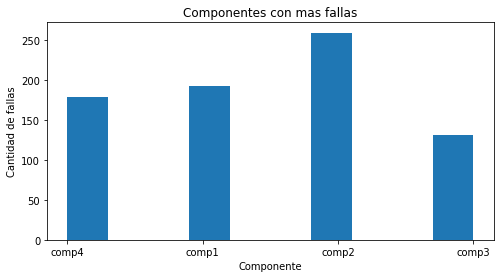

In [37]:
fig, ax = plt.subplots(figsize = (8,4))
ax.hist(failures_df['failure'])
ax.set_title('Componentes con mas fallas')
ax.set_xlabel('Componente')
ax.set_ylabel('Cantidad de fallas')
plt.show()

In [11]:
machines_df.head(3)

machineID   model  age
0          1  model3   18
1          2  model4    7
2          3  model3    8

In [ ]:
!pip install -U dataprep

In [ ]:
from dataprep.eda import create_report
report = create_report(telemetry_df, title='Reporte Telemetria')

Reporte Telemetria
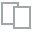
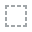
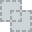
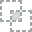
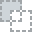
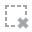
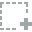
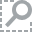
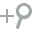
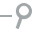
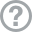
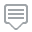
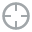
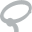
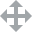
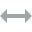
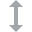
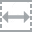
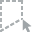
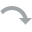
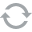
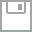
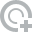
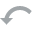
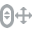
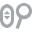
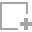
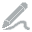
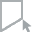
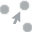
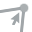
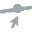

In [ ]:
report

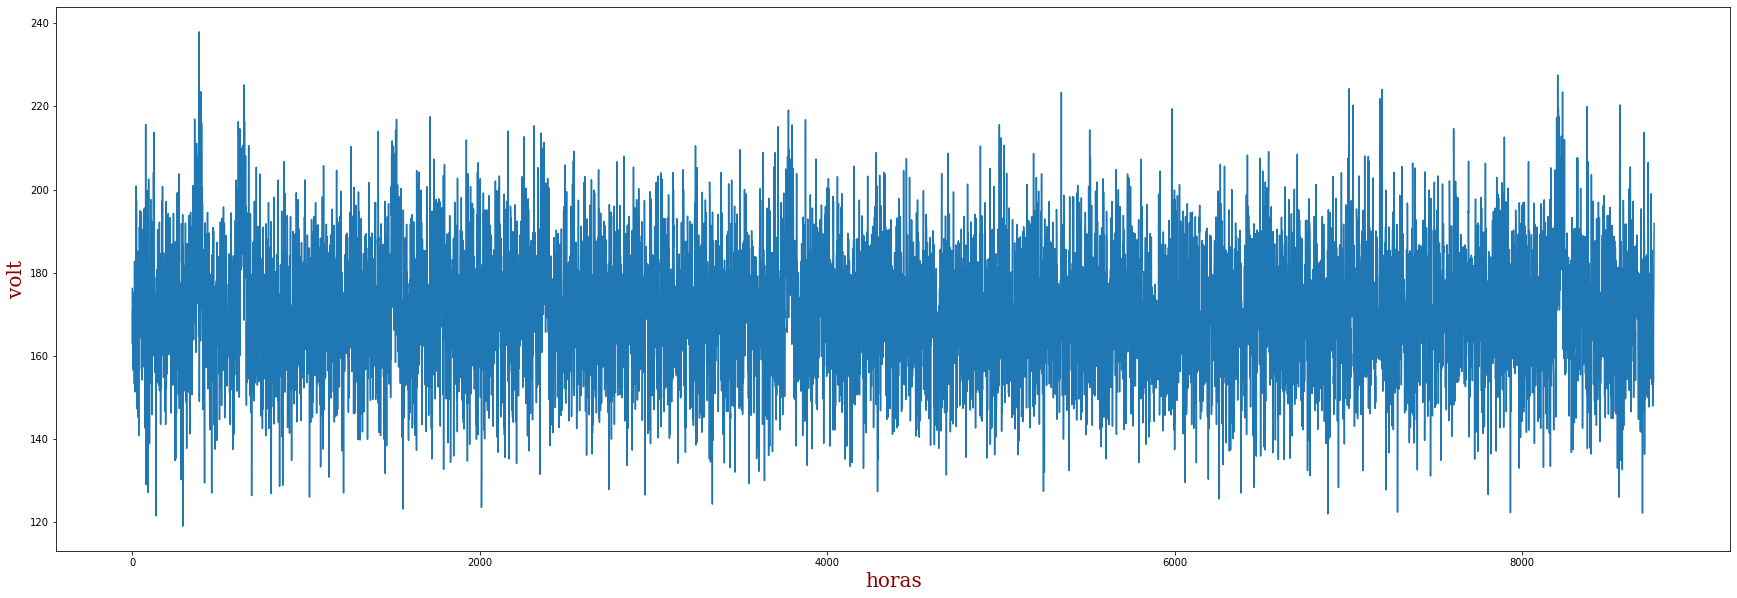

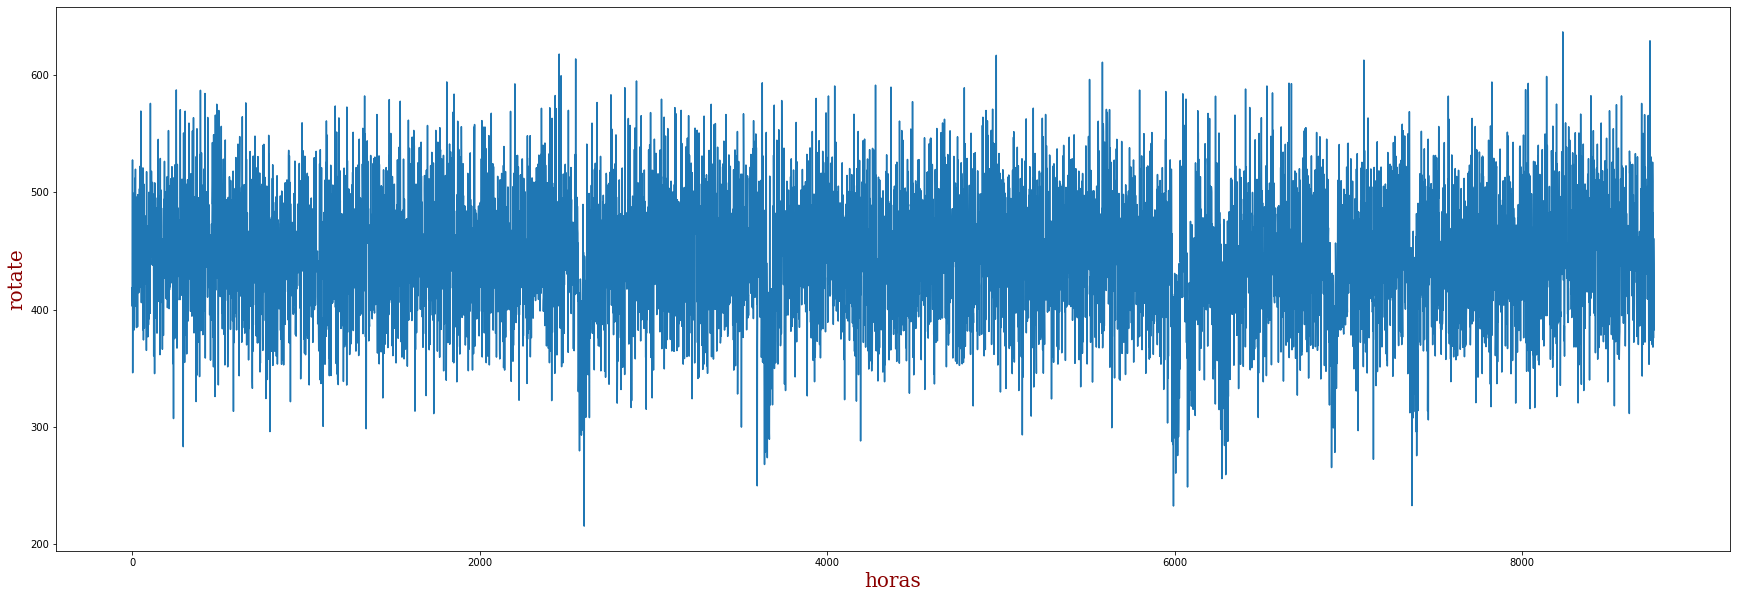

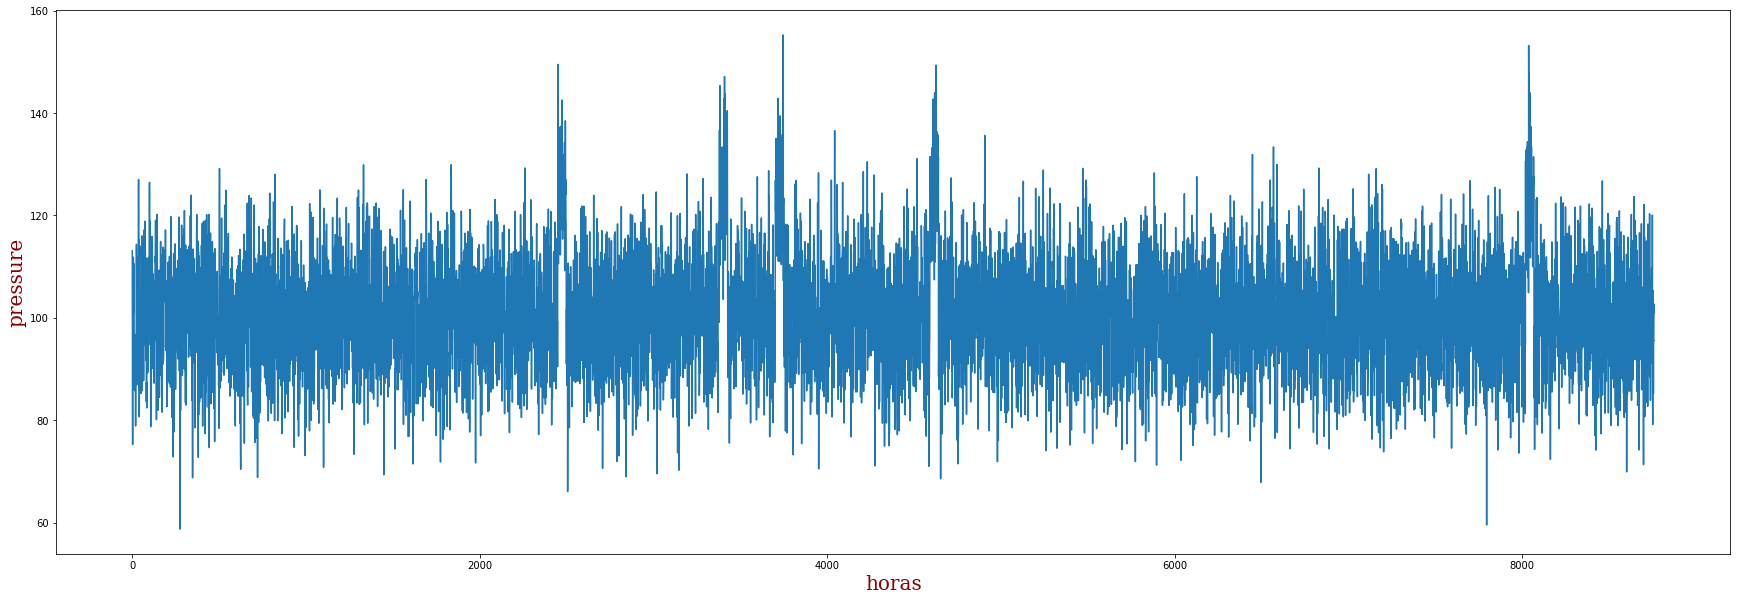

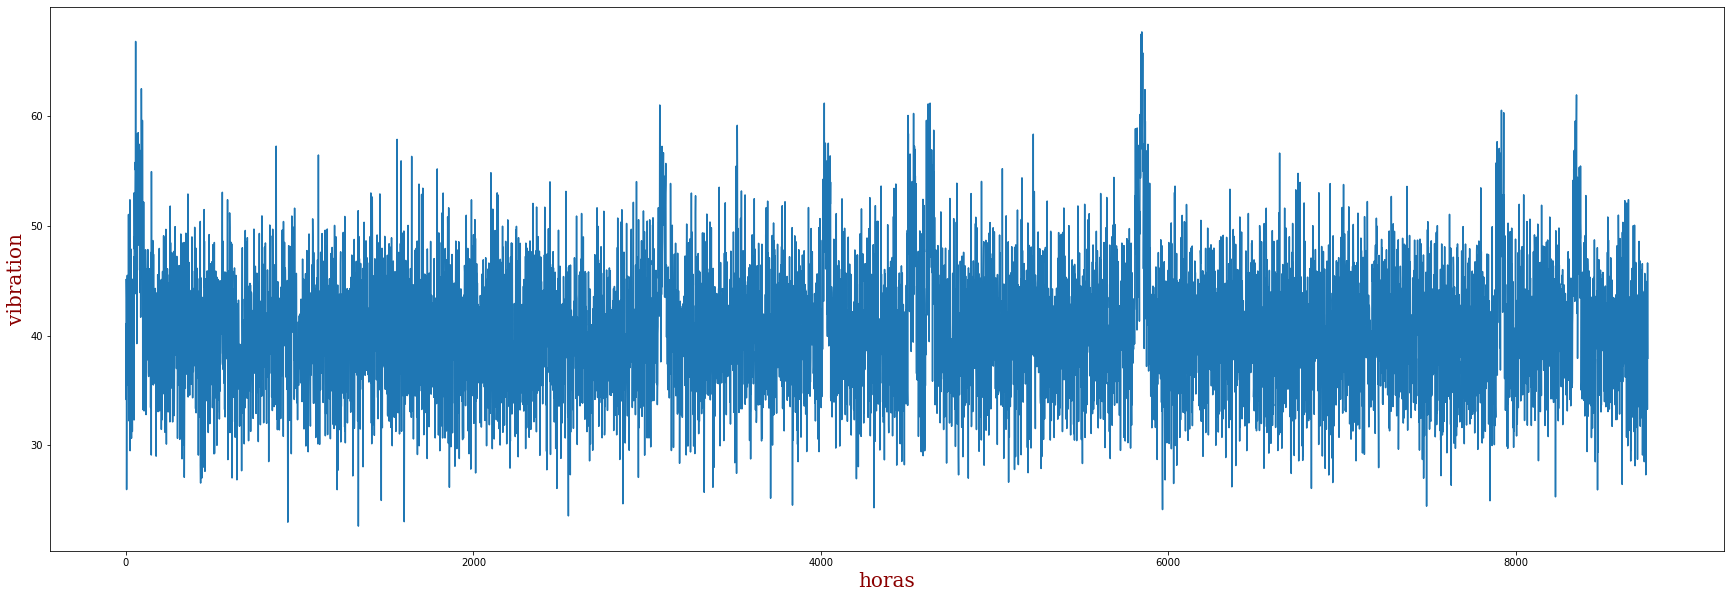

In [13]:
# Paramatros de telemetria para un equipo Machine 7
tele_machine_7=telemetry_df[telemetry_df['machineID']==7]
date_time= range(0,len(tele_machine_7))
for i in range(2,6):
 fig=plt.figure(figsize=(30,10))
 plt.plot(date_time,telemetry_df.iloc[:len(tele_machine_7),i])
 plt.ylabel(telemetry_df.columns[i],fontdict={'family': 'serif','color':  'darkred','weight': 'normal','size': 20})
 plt.xlabel('horas',fontdict={'family': 'serif','color':  'darkred','weight': 'normal','size': 20})

In [233]:
#Funcion para convertir el formato de la fecha de las tablas
tablas = [telemetry_df, maint_df, failures_df, errors_df]
for df in tablas:
    df["datetime"] = pd.to_datetime(df["datetime"], format="%Y-%m-%d %H:%M:%S")

In [6]:
print('El total de registros de telemetria es:' ,telemetry_df.shape)
print('El total de registros de mantenimientos es:',maint_df.shape)
print('El total de registros de fallas es:',failures_df.shape)
print('El total de registros de errores es:',errors_df.shape)

El total de registros de telemetria es: (876100, 6)
El total de registros de mantenimientos es: (3286, 3)
El total de registros de fallas es: (761, 3)
El total de registros de errores es: (3919, 3)


In [8]:
print('Cantidad unica de maquinas:' ,telemetry_df.machineID.nunique())

Cantidad unica de maquinas: 100


Las instancias de los parametros de funcionamiento no presentan valores nulos

In [ ]:
telemetry_df.isna().sum()

datetime     0
machineID    0
volt         0
rotate       0
pressure     0
vibration    0
dtype: int64

Los registros de la tabla telemetry van de enero del 2015 al primer dia del 2016

In [ ]:
# Cual es marco temporal de la data telemetry
telemetry_df.datetime.describe(datetime_is_numeric=True)

count                           676578
mean     2015-07-02 08:04:27.055683328
min                2015-01-01 06:00:00
25%                2015-04-01 16:00:00
50%                2015-07-02 05:00:00
75%                2015-10-01 18:00:00
max                2016-01-01 06:00:00
Name: datetime, dtype: object

In [235]:
telemetry_df.head(5)

datetime  machineID        volt      rotate    pressure  \
0 2015-01-01 06:00:00          1  176.217853  418.504078  113.077935   
1 2015-01-01 07:00:00          1  162.879223  402.747490   95.460525   
2 2015-01-01 08:00:00          1  170.989902  527.349825   75.237905   
3 2015-01-01 09:00:00          1  162.462833  346.149335  109.248561   
4 2015-01-01 10:00:00          1  157.610021  435.376873  111.886648   

   vibration  
0  45.087686  
1  43.413973  
2  34.178847  
3  41.122144  
4  25.990511

En los registros de Mantenimiento se pueden encontrar datos del año 2014

In [ ]:
maint_df.datetime.describe(datetime_is_numeric=True)

count                             3286
mean     2015-05-30 14:40:36.518563840
min                2014-06-01 06:00:00
25%                2015-03-03 06:00:00
50%                2015-06-13 06:00:00
75%                2015-09-18 00:00:00
max                2016-01-01 06:00:00
Name: datetime, dtype: object

In [ ]:
telemetry_df.corr()

machineID      volt    rotate  pressure  vibration
machineID   1.000000 -0.001037  0.000171  0.005192  -0.000922
volt       -0.001037  1.000000 -0.001511  0.001652   0.002390
rotate      0.000171 -0.001511  1.000000 -0.000688  -0.003056
pressure    0.005192  0.001652 -0.000688  1.000000   0.001395
vibration  -0.000922  0.002390 -0.003056  0.001395   1.000000

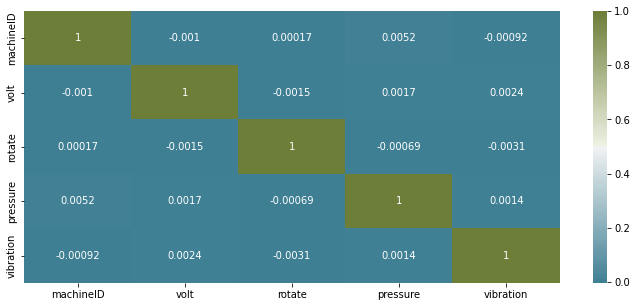

In [7]:
# calculate correlation matrix
corr0 = telemetry_df.corr()# plot the heatmap
plt.figure(figsize = (12,5))
sns.heatmap(corr0, xticklabels=corr0.columns, yticklabels=corr0.columns, annot=True, cmap=sns.diverging_palette(220, 100, as_cmap=True))

Como se observa en la matriz de correlacion, los valores son muy cercanos a cero, indicando la no dependencia de los parametros estudiados. 

## Analisis sobre eventos de intervencion de mantenimiento(fallas, errores, mantenimientos)

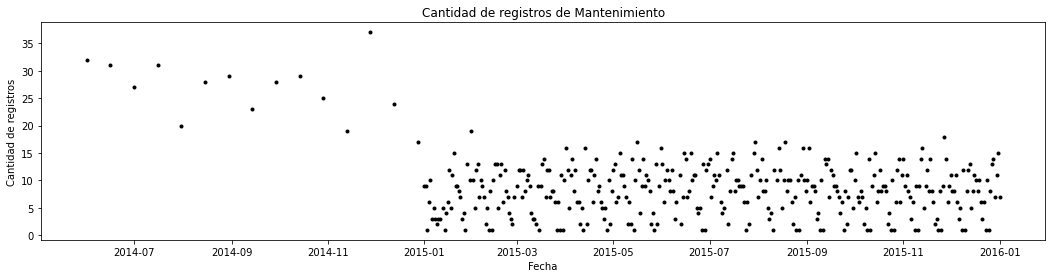

In [ ]:
maint_df.datetime.dt.date.value_counts().plot(
    style="k.", 
    figsize=(18, 4), 
    title="Cantidad de registros de Mantenimiento")
plt.ylabel("Cantidad de registros")
plt.xlabel("Fecha")
plt.show()

Se puede observar como aumentó la frecuencia de las intervenciones de mantenimiento a los equipos durante el año 2015. Sin embargo esto puede deberse a muchos motivos como falta de una politica de registro de las fallas durante el 2014,ausencia de un programa confiable de registro de intervenciones, etc

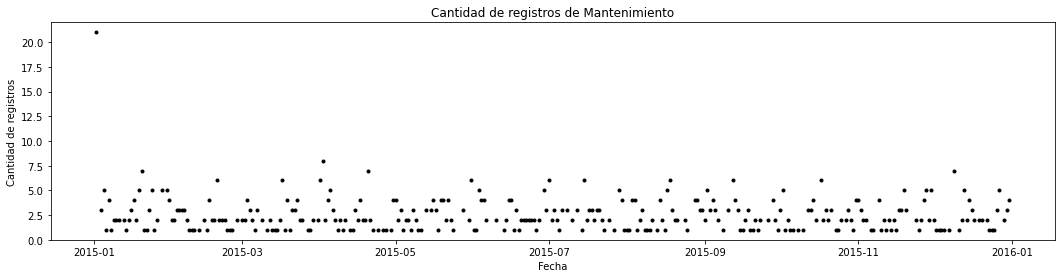

In [251]:
failures_df.datetime.dt.date.value_counts().plot(
    style="k.", 
    figsize=(18, 4), 
    title="Cantidad de registros de Mantenimiento")
plt.ylabel("Cantidad de registros")
plt.xlabel("Fecha")
plt.show()

## Existira alguna relacion entre la cantidad de mantenimiento, cantidad de errores y la edad?

In [253]:
errors_df.head(2)

datetime  machineID errorID
0 2015-01-03 07:00:00          1  error1
1 2015-01-03 20:00:00          1  error3

In [256]:
# Unir la tabla que contiene la informacion de las maquinas con la informacion de los errores
maquinaria_eventos_df = pd.merge(telemetry_df, errors_df, how='left', on="machineID")
maquinaria_eventos_df

datetime_x  machineID        volt      rotate    pressure  \
0        2015-01-01 06:00:00          1  176.217853  418.504078  113.077935   
1        2015-01-01 06:00:00          1  176.217853  418.504078  113.077935   
2        2015-01-01 06:00:00          1  176.217853  418.504078  113.077935   
3        2015-01-01 06:00:00          1  176.217853  418.504078  113.077935   
4        2015-01-01 06:00:00          1  176.217853  418.504078  113.077935   
...                      ...        ...         ...         ...         ...   
34334354 2016-01-01 06:00:00        100  171.336037  496.096870   79.095538   
34334355 2016-01-01 06:00:00        100  171.336037  496.096870   79.095538   
34334356 2016-01-01 06:00:00        100  171.336037  496.096870   79.095538   
34334357 2016-01-01 06:00:00        100  171.336037  496.096870   79.095538   
34334358 2016-01-01 06:00:00        100  171.336037  496.096870   79.095538   

          vibration          datetime_y errorID  
0         45.087686 2015-01-03 07:00:00  error1  
1         45.087686 2015-01-03 20:00:00  error3  
2         45.087686 2015-01-04 06:00:00  error5  
3         45.087686 2015-01-10 15:00:00  error4  
4         45.087686 2015-01-22 10:00:00  error4  
...             ...                 ...     ...  
34334354  37.845245 2015-11-21 08:00:00  error2  
34334355  37.845245 2015-12-04 02:00:00  error1  
34334356  37.845245 2015-12-08 06:00:00  error2  
34334357  37.845245 2015-12-08 06:00:00  error3  
34334358  37.845245 2015-12-22 03:00:00  error3  

[34334359 rows x 8 columns]

In [257]:
maquinaria_eventos_df.isnull().sum()

datetime_x    0
machineID     0
volt          0
rotate        0
pressure      0
vibration     0
datetime_y    0
errorID       0
dtype: int64

Aca podemos ver cuales maquinas y de que modelos son los que presentan mayor numero de fallas

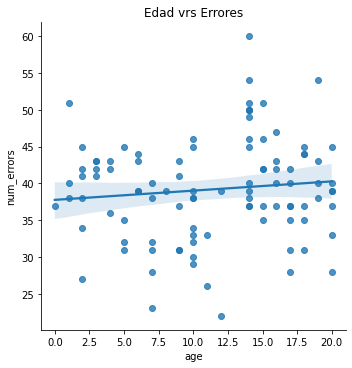

In [ ]:
sns.lmplot(x='age', y = 'num_errors', data= maquinaria_eventos_df).set(title='Edad vrs Errores')

No se puede apreciar mayor relacion entre estas dos variables

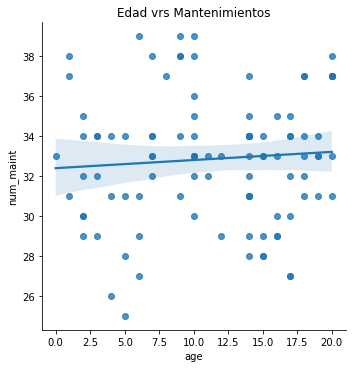

In [ ]:
sns.lmplot(x='age', y = 'num_maint', data= maquinaria_eventos_df).set(title='Edad vrs Mantenimientos')

Similar a la grafica anterior (age-errors) aca tampoco se aprecia una correlacion entre las variables estudiadas.

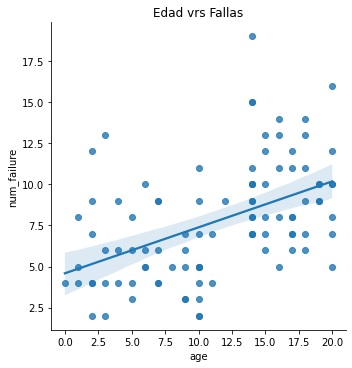

In [ ]:
sns.lmplot(x='age', y = 'num_failure', data= maquinaria_eventos_df).set(title='Edad vrs Fallas')

A diferencia de las otras graficas estudiada y talvez como era de esperarse, aca si se puede observar algun tipo de relacion entre la edad de las maquinas y la cantidad de fallas que registran. Sin embargo, tambien se observa valores muy dispersos.

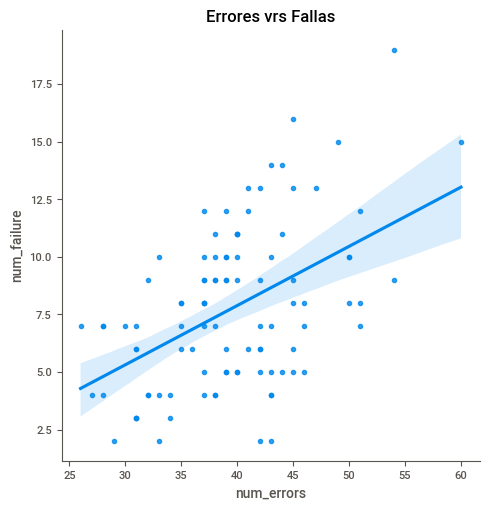

In [ ]:
sns.lmplot(x='num_errors', y = 'num_failure', data= maquinaria_eventos_df).set(title='Errores vrs Fallas')

Como lo muestra la grafica, hay alguna correlacion entre la edad y las fallas. Pero tambien se puede observar alguna correlacion entre los eventos de errores y las fallas.

In [ ]:
maquinaria_eventos_df.corr()

machineID       age  num_errors  num_maint  num_failure
machineID     1.000000  0.100196    0.107982  -0.077903     0.096496
age           0.100196  1.000000    0.106931   0.075445     0.476459
num_errors    0.107982  0.106931    1.000000  -0.026558     0.483735
num_maint    -0.077903  0.075445   -0.026558   1.000000    -0.030258
num_failure   0.096496  0.476459    0.483735  -0.030258     1.000000

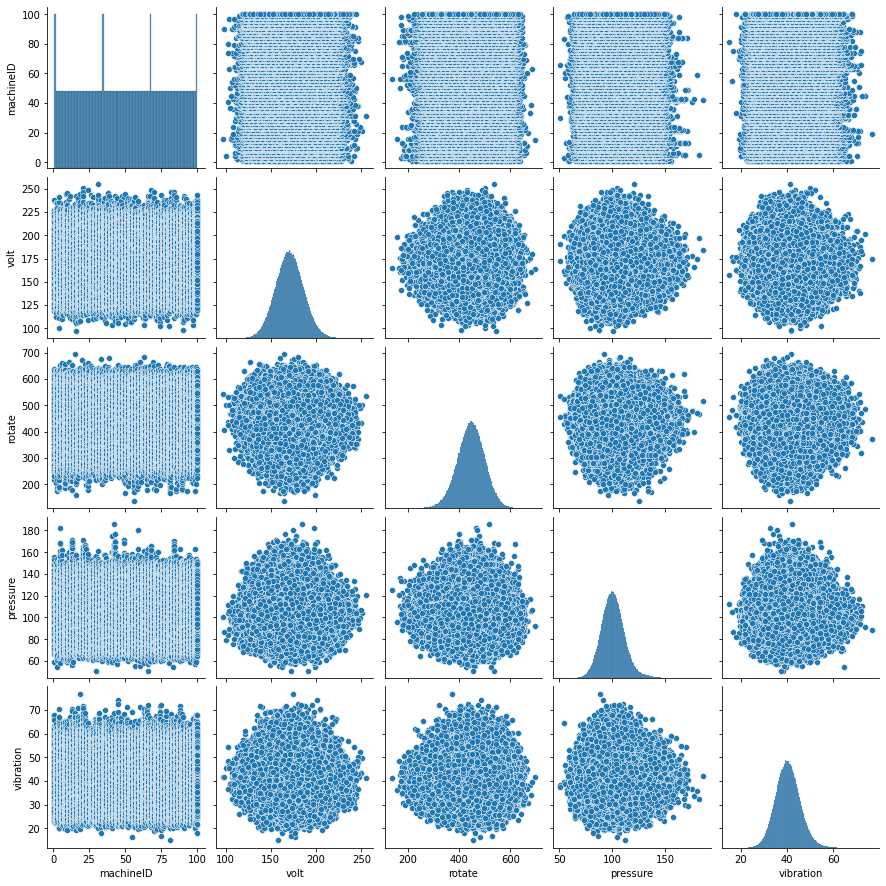

In [ ]:
sns.pairplot (telemetry_df)

En este pairplot se pueden observar como se distribuyen todos los valores de los parametros de funcionamiento registrados. Se pueden observar como algunos parametros muestran algunos valores un poco alejados de la media. Seran estos puntos evidencia de una falla?

In [ ]:
telemetry_df.nlargest(10,'vibration')

datetime  machineID        volt      rotate    pressure  \
159976  2015-04-06 04:00:00         19  174.840612  373.066912   88.172375   
385504  2015-01-02 02:00:00         45  201.023064  487.681597   91.665983   
385524  2015-01-02 22:00:00         45  180.295897  435.583643  110.197020   
653385  2015-07-31 13:00:00         75  182.932649  320.885082  106.370366   
573049  2015-05-30 14:00:00         66  194.938019  472.430625  101.707816   
181495  2015-09-19 17:00:00         21  187.571417  407.162076   99.166685   
765199  2015-05-05 22:00:00         88  166.727672  403.553630   94.233712   
645599  2015-09-10 04:00:00         74  138.103104  512.076404  108.107355   
440720  2015-04-22 12:00:00         51  165.211271  544.775757  116.775549   
522510  2015-08-23 01:00:00         60  140.188130  447.091985   93.716004   

        vibration  
159976  76.791072  
385504  73.948949  
385524  72.335124  
653385  71.972128  
573049  71.949134  
181495  71.752014  
765199  71.751134  
645599  71.601768  
440720  71.182495  
522510  71.049543

Se observa que la maquina19 registra el valor mas alto de vibracion. Podra existir alguna relacion entre la lectura de la vibracion y los episodios de falla presantados por esa maquina?

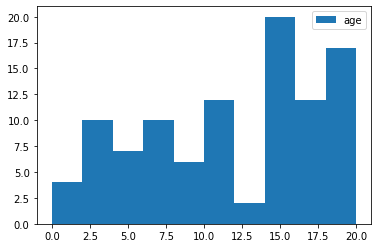

In [ ]:
machines_df['age'].hist(grid=False, legend=True) # Distribucion de la edad de la maquinaria

In [22]:
pd.merge(telemetry_df,failures_df, how = 'inner') # Este dataframe solo incluye las instancias con fallas

datetime  machineID        volt      rotate    pressure  \
0    2015-01-05 06:00:00          1  179.303153  499.777962  111.833028   
1    2015-03-06 06:00:00          1  198.257975  456.862342   89.333995   
2    2015-04-20 06:00:00          1  180.050801  346.362480  105.661164   
3    2015-06-19 06:00:00          1  187.673963  493.005160  105.334392   
4    2015-09-02 06:00:00          1  144.094532  409.380150  106.720871   
..                   ...        ...         ...         ...         ...   
756  2015-11-29 06:00:00         99  205.336154  398.728678  116.164197   
757  2015-12-14 06:00:00         99  152.143212  394.182739  114.212265   
758  2015-02-12 06:00:00        100  226.666914  484.516473   97.521897   
759  2015-09-10 06:00:00        100  201.781023  520.820195   90.944571   
760  2015-12-09 06:00:00        100  144.720190  377.188361  109.995936   

     vibration failure  
0    52.383097   comp4  
1    38.671900   comp1  
2    39.218055   comp2  
3    53.963961   comp4  
4    57.454990   comp4  
..         ...     ...  
756  35.588661   comp3  
757  40.852043   comp4  
758  53.129437   comp1  
759  39.066892   comp1  
760  28.433400   comp2  

[761 rows x 7 columns]

In [9]:
! pip install sweetviz

     --------------------------------------- 15.1/15.1 MB 32.8 MB/s eta 0:00:00
     ---------------------------------------- 78.5/78.5 kB 2.2 MB/s eta 0:00:00
     -------------------------------------- 133.1/133.1 kB 7.7 MB/s eta 0:00:00


In [10]:
import sweetviz as sv

c:\Users\muril\anaconda3\envs\coderhouse\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
report1 = sv.analyze(telemetry_df)
report1.show_html()

![](https://drive.google.com/uc?export=view&id=1pNpNwEcGmR1tO30HDE9T6UOr3rKXb1b1)

# DESAFIO n14: Feature Selection

In [6]:
# Se transformaron los atributos categoricos de las fallas a numericos 
prueba = pd.merge(telemetry_df,failures_df, how = 'outer')
prueba.head(3)


datetime  machineID        volt      rotate    pressure  \
0  2015-01-01 06:00:00          1  176.217853  418.504078  113.077935   
1  2015-01-01 07:00:00          1  162.879223  402.747490   95.460525   
2  2015-01-01 08:00:00          1  170.989902  527.349825   75.237905   

   vibration failure  
0  45.087686     NaN  
1  43.413973     NaN  
2  34.178847     NaN

In [5]:
prueba.shape

(876142, 7)

In [7]:
prueba['failure'].value_counts()

comp2    259
comp1    192
comp4    179
comp3    131
Name: failure, dtype: int64

In [8]:
prueba['failure'] = prueba['failure'].fillna('no failure')

In [13]:
prueba.sample(5)

datetime  machineID        volt      rotate    pressure  \
641893  2015-04-07 10:00:00         74  165.948887  430.090254   98.353175   
854719  2015-07-22 18:00:00         98  165.698891  445.790227   95.769015   
210356  2015-01-04 10:00:00         25  182.001195  488.128248  113.073937   
320563  2015-08-03 14:00:00         37  155.551910  422.282853  101.226107   
837269  2015-07-25 21:00:00         96  162.365315  460.785476  106.112485   

        vibration     failure  
641893  49.346896  no failure  
854719  43.875798  no failure  
210356  38.833607  no failure  
320563  45.647681  no failure  
837269  39.450030  no failure

In [12]:
prueba['failure'].value_counts()

no failure    875381
comp2            259
comp1            192
comp4            179
comp3            131
Name: failure, dtype: int64

In [9]:
# Se crea una nueva columna llamada Target
prueba['Target'] = np.where(prueba['failure']=='no failure',0,1)

In [10]:
prueba.sample(3)

datetime  machineID        volt      rotate    pressure  \
519767  2015-04-29 14:00:00         60  177.397904  381.698232   92.217543   
415325  2015-05-28 12:00:00         48  182.843170  537.638322   96.009421   
820173  2015-08-12 16:00:00         94  158.797870  429.590326  104.330267   

        vibration     failure  Target  
519767  23.534280  no failure       0  
415325  35.459679  no failure       0  
820173  38.127301  no failure       0

Se agrega columnas con los datos del modelo y la edad de la maquinas para poder seleccionar el modelo con mas instancias de fallas

In [11]:
df = pd.merge(prueba,machines_df, how = 'outer')
df.head(3)

datetime  machineID        volt      rotate    pressure  \
0  2015-01-01 06:00:00          1  176.217853  418.504078  113.077935   
1  2015-01-01 07:00:00          1  162.879223  402.747490   95.460525   
2  2015-01-01 08:00:00          1  170.989902  527.349825   75.237905   

   vibration     failure  Target   model  age  
0  45.087686  no failure       0  model3   18  
1  43.413973  no failure       0  model3   18  
2  34.178847  no failure       0  model3   18

In [32]:
df = df[df.model == 'model3']
df.head(5)

datetime  machineID        volt      rotate    pressure  \
0  2015-01-01 06:00:00          1  176.217853  418.504078  113.077935   
1  2015-01-01 07:00:00          1  162.879223  402.747490   95.460525   
2  2015-01-01 08:00:00          1  170.989902  527.349825   75.237905   
3  2015-01-01 09:00:00          1  162.462833  346.149335  109.248561   
4  2015-01-01 10:00:00          1  157.610021  435.376873  111.886648   

   vibration     failure  Target   model  age  
0  45.087686  no failure       0  model3   18  
1  43.413973  no failure       0  model3   18  
2  34.178847  no failure       0  model3   18  
3  41.122144  no failure       0  model3   18  
4  25.990511  no failure       0  model3   18

In [19]:
df['Target'].value_counts()

0    306423
1       221
Name: Target, dtype: int64

In [12]:
df.drop(['datetime','machineID','model','Target'],axis=1, inplace= True)

In [34]:
df.head(3)

volt      rotate    pressure  vibration     failure  age
0  176.217853  418.504078  113.077935  45.087686  no failure   18
1  162.879223  402.747490   95.460525  43.413973  no failure   18
2  170.989902  527.349825   75.237905  34.178847  no failure   18

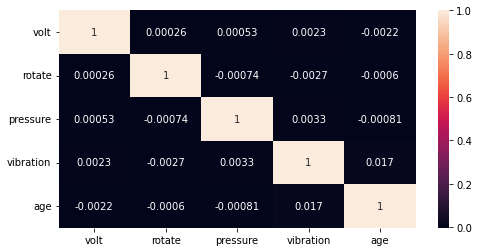

In [45]:
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(),annot= True )
plt.show()

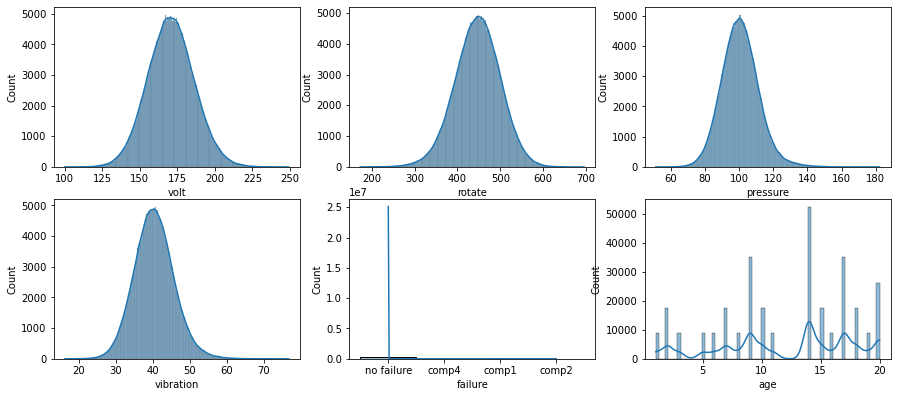

In [48]:
plt.figure(figsize=(15,10))
for i,col in enumerate(df.columns, 1):
    plt.subplot(3,3,i)
    sns.histplot(df[col], kde= True)


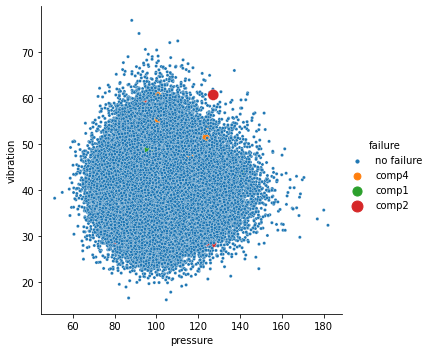

In [49]:
sns.relplot(x='pressure' , y='vibration', hue='failure', size='failure',sizes=(120,10), data= df)

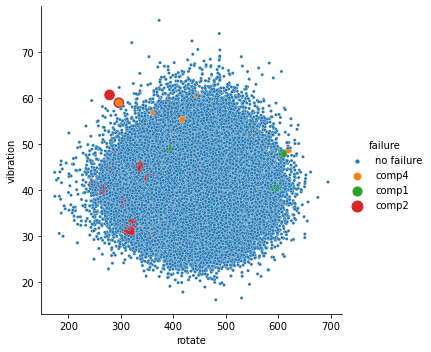

In [50]:
sns.relplot(x='rotate' , y='vibration', hue='failure', size='failure',sizes=(120,10), data= df)

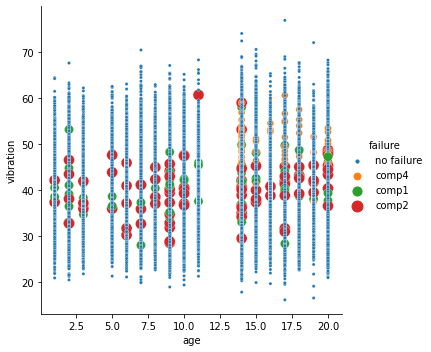

In [51]:
sns.relplot(x='age' , y='vibration', hue='failure', size='failure',sizes=(120,10), data= df)

En esta grafica se puede observar como el comp4 solo presenta fallas en aquellos equipos que tienen las de 13 años de edad. En los equipos jovenes no se presenta la falla de ese componentes para los mismos niveles de vibracion.

In [13]:
! pip install category_encoders

In [14]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['failure'])
df = encoder.fit_transform(df)
df.head(2)

volt      rotate    pressure  vibration  failure  age
0  176.217853  418.504078  113.077935  45.087686        1   18
1  162.879223  402.747490   95.460525  43.413973        1   18

In [15]:
from sklearn.preprocessing import LabelEncoder
scaler = LabelEncoder()
df['failure'] = scaler.fit_transform(df['failure'])

In [16]:
X = df.drop(columns='failure' , axis=1)
y = df['failure']

Se aplica la tecnica SMOTETomek para balancear el dataset

In [17]:
from imblearn.combine import SMOTETomek
smote = SMOTETomek(random_state =42)
X1_res , y1_res = smote.fit_resample(X,y)

In [18]:
df_X = pd.DataFrame(X1_res)
df_y = pd.DataFrame(y1_res)

In [19]:
df1 = pd.concat([df_X , df_y] , axis=1)

In [20]:
# Verificar la aplicacion de la tecnica de balanceo
df1["failure"].value_counts()

0    875381
4    875376
3    874594
1    874089
2    873821
Name: failure, dtype: int64

In [62]:
df1.head(3)

volt      rotate    pressure  vibration  age  failure
0  176.217853  418.504078  113.077935  45.087686   18        0
1  162.879223  402.747490   95.460525  43.413973   18        0
2  170.989902  527.349825   75.237905  34.178847   18        0

In [21]:
X = df1.drop(columns='failure' , axis=1)
y = df1['failure']

## Validacion del modelos (tecnica StratifiedKFold)

In [1]:
# Para prevenir el overfitting
from sklearn.model_selection import StratifiedKFold

In [26]:
skf = StratifiedKFold(n_splits=5 , random_state = 42,shuffle=True)
for train_index , test_index , in skf.split(X,y):
	X1_train, X1_test = X.iloc[train_index],X.iloc[test_index]
	y1_train, y1_test = y.iloc[train_index],y.iloc[test_index]
	train_0, train_1 = len(y1_train[y1_train==0]),len(y1_train[y1_train==1])
	test_0, test_1 = len(y1_test[y1_test==0]),len(y1_test[y1_test==1])
	print("train: 0=%d , 1=%d , test:0=%d , 1=%d" % (train_0,train_1,test_0,test_1))

train: 0=700304 , 1=699272 , test:0=175077 , 1=174817
train: 0=700305 , 1=699271 , test:0=175076 , 1=174818
train: 0=700305 , 1=699271 , test:0=175076 , 1=174818
train: 0=700305 , 1=699271 , test:0=175076 , 1=174818
train: 0=700305 , 1=699271 , test:0=175076 , 1=174818


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OutputCodeClassifier
from sklearn.model_selection import GridSearchCV , learning_curve
from sklearn.pipeline import Pipeline , make_pipeline
from sklearn.preprocessing import (OneHotEncoder , PowerTransformer, StandardScaler)
from sklearn.compose import ColumnTransformer


In [27]:
# Dividir en train/test
X_train , X_test, y_train , y_test = train_test_split(X,y,random_state=42,test_size=0.33,stratify=y)

In [28]:
# Construir un preprocesador numerico
to_log = ["rotate"] 
to_scale = ['pressure','volt','vibration','age']
numeric_pipe1 = make_pipeline(PowerTransformer())
numeric_pipe2 = make_pipeline(StandardScaler())

In [29]:
# Construir un preprocesador categorico
categorical_cols = X.select_dtypes(include = "object").columns.to_list()
categorical_pipe = make_pipeline(OneHotEncoder(sparse= False , handle_unknown = "ignore"))

In [30]:
# Full processor
full = ColumnTransformer(
	transformers = [
	("Categorical", categorical_pipe, categorical_cols),
	("power_transform", numeric_pipe1,to_log),
	("standarization", numeric_pipe2, to_scale),])

In [31]:
rfc = OutputCodeClassifier(RandomForestClassifier(), code_size=5, random_state=42)


In [32]:
pipeline = Pipeline(
    steps=[('preprocess', full), ('base', rfc,),])

In [ ]:
'''model_rfc = pipeline.fit(X_train , y_train)
y_pred_rfc = model_rfc.predict(X_test)'''

## Regresion Logistica

In [33]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_confusion_matrix

# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)

log_train = round(logreg.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred_lr, y_test) * 100, 2)

c:\Users\muril\anaconda3\envs\coderhouse\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy    : 60.21 %
Model Accuracy Score : 60.2 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.45      0.34      0.39    288876
           1       0.71      0.84      0.77    288450
           2       0.53      0.57      0.55    288361
           3       0.54      0.46      0.49    288616
           4       0.71      0.81      0.75    288874

    accuracy                           0.60   1443177
   macro avg       0.59      0.60      0.59   1443177
weighted avg       0.59      0.60      0.59   1443177

--------------------------------------------------------


c:\Users\muril\anaconda3\envs\coderhouse\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


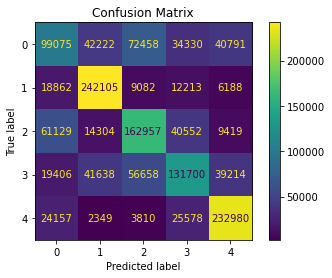

In [34]:
print("Training Accuracy    :",log_train ,"%")
print("Model Accuracy Score :",log_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_lr))
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(logreg, X_test, y_test);
plt.title('Confusion Matrix');

## Decision Tree

In [35]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier()
decision.fit(X_train, y_train)
y_pred_dec = decision.predict(X_test)

decision_train = round(decision.score(X_train, y_train) * 100, 2)
decision_accuracy = round(accuracy_score(y_pred_dec, y_test) * 100, 2)

Training Accuracy    : 100.0 %
Model Accuracy Score : 99.47 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    288876
           1       1.00      1.00      1.00    288450
           2       0.99      1.00      1.00    288361
           3       0.99      1.00      0.99    288616
           4       1.00      1.00      1.00    288874

    accuracy                           0.99   1443177
   macro avg       0.99      0.99      0.99   1443177
weighted avg       0.99      0.99      0.99   1443177

--------------------------------------------------------


c:\Users\muril\anaconda3\envs\coderhouse\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


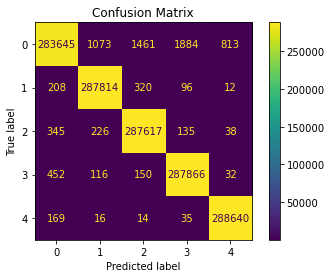

In [36]:
print("Training Accuracy    :",decision_train ,"%")
print("Model Accuracy Score :",decision_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_dec))
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(decision, X_test, y_test);
plt.title('Confusion Matrix');

## Random Forest

In [37]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
random_forest.score(X_train, y_train)

random_forest_train = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_accuracy = round(accuracy_score(y_pred_rf, y_test) * 100, 2)

Training Accuracy    : 100.0 %
Model Accuracy Score : 99.81 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    288876
           1       1.00      1.00      1.00    288450
           2       1.00      1.00      1.00    288361
           3       1.00      1.00      1.00    288616
           4       1.00      1.00      1.00    288874

    accuracy                           1.00   1443177
   macro avg       1.00      1.00      1.00   1443177
weighted avg       1.00      1.00      1.00   1443177

--------------------------------------------------------


c:\Users\muril\anaconda3\envs\coderhouse\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


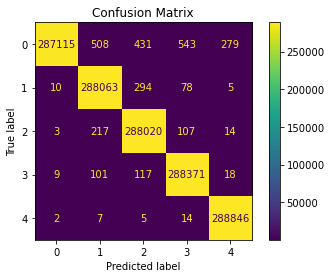

In [38]:
print("Training Accuracy    :",random_forest_train ,"%")
print("Model Accuracy Score :",random_forest_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_rf))
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(random_forest, X_test, y_test);
plt.title('Confusion Matrix');

## Conclusiones Desafio 

Para este desafio se realizaron algunos cambios en la conformacion con el dataframe que serviria como entrada al modelo.
1. Se decidio incluir todos los componentes que presentas fallas para un modelo especificio de equipo (a diferencia del desafio anteior donde solo se selecciono el componente que registraba mayor cantidad de fallas).
2.  Se agrego la categoria de no failure.
3. Se balanceo el dataset empleando la tecnica 
4. Se aplico la tecnica StratifiedKFold para validacion del modelo
5. Se probaron 3 modelos de los cuales el que presento un mejor desempeno fue: Random Forest seguido del Decision Tree y el que peor se desempeno para esta tarea en particular de clasificacicon fue la regresion logistica.